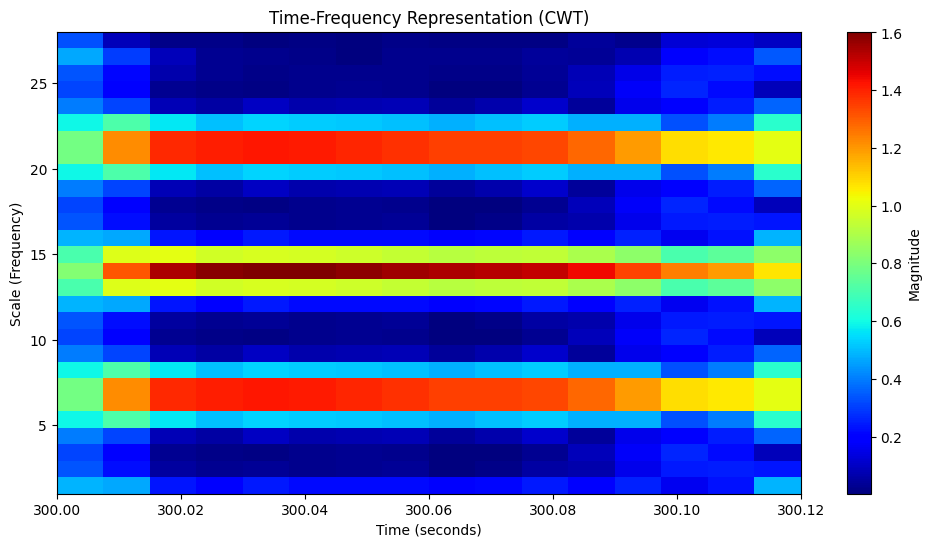

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import cwt, morlet


path = r'Aanand_19_01.csv'
df = pd.read_csv(path)


eeg_readings = df[['Fp1', 'Fp2', 'C3', 'C4', 'P7', 'P8', 'O1', 'O2', 'F7', 'F8', 'F3', 'F4', 'T7', 'T8', 'P3', 'P4']].values
labels = df['stim'].values

min_val = np.min(eeg_readings)
max_val = np.max(eeg_readings)
eeg_readings_normalized = (eeg_readings - min_val) / (max_val - min_val)

sample_index = 3

eeg_sample = eeg_readings_normalized[sample_index]

sampling_frequency = 120
time_points = np.arange(len(eeg_sample)) / sampling_frequency  


time_offset_minutes = 5
time_offset_seconds = time_offset_minutes * 60
time_points += time_offset_seconds

# Perform Continuous Wavelet Transform (CWT)
wavelet = morlet
widths = np.arange(1, 29)  # Adjust the widths based on your frequency range of interest
coeffs = cwt(eeg_sample, wavelet, widths)

# Plot the time-frequency representations as heatmaps
plt.figure(figsize=(12, 6))
plt.imshow(np.abs(coeffs), extent=[min(time_points), max(time_points), min(widths), max(widths)], aspect='auto', cmap='jet', interpolation='nearest')
plt.colorbar(label='Magnitude')
plt.title('Time-Frequency Representation (CWT)')
plt.xlabel('Time (seconds)')
plt.ylabel('Scale (Frequency)')
plt.show()

In [7]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.callbacks import EarlyStopping

X_train, X_test, y_train, y_test = train_test_split(eeg_readings, labels, test_size=0.2, random_state=42)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1, 1)  # (samples, time steps, channels, 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1, 1)


model = Sequential()
model.add(Conv2D(250, (3, 1), activation='relu', input_shape=(X_train.shape[1], 1, 1)))
model.add(MaxPooling2D((2, 1)))
model.add(Conv2D(250, (3, 1), activation='relu'))
model.add(MaxPooling2D((2, 1)))
model.add(Conv2D(100, (2, 1), activation='relu'))  # Adjust the filter size to match the dimensions
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='linear'))  # Output layer


model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_split=0.1, epochs=32, batch_size=16, callbacks=[early_stop], verbose=1)

y_pred = model.predict(X_test)
mse = np.mean(np.square(y_test - y_pred))
mae = np.mean(np.abs(y_test - y_pred))
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/32
2937/2937 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - loss: 117659.0312 - mae: 88.6852 - val_loss: 4.6096 - val_mae: 1.4520
Epoch 2/32
2937/2937 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - loss: 94.2709 - mae: 6.1868 - val_loss: 2.5222 - val_mae: 1.0524
Epoch 3/32
2937/2937 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - loss: 1005.7098 - mae: 5.7623 - val_loss: 12.6997 - val_mae: 3.0901
Epoch 4/32
2937/2937 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 14.6291 - mae: 1.3435 - val_loss: 0.2633 - val_mae: 0.3524
Epoch 5/32
2937/2937 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - loss: 5.5702 - mae: 1.0278 - val_loss: 0.4536 - val_mae: 0.5674
Epoch 6/32
2937/2937 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - loss: 1.8478 - mae: 0.9383 - val_loss: 0.1098 - val_mae: 0.2477
Epoch 7/32
2937/2937 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - loss: 1.5005 - mae: 0.3857 - val_loss: 0.0334 - val_mae: 0.1192
Epoch 8/32
2937/2937 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - loss: 0.0395 - mae: 0.1390 - val_loss: 0.0089 - val_mae: 0.0626
Epoch 9/32
2937/2937